In [2]:
library(plyr)
library(data.table)
library(stringr)
library(ggplot2)

In [3]:
res_df <- fread("/illumina/scratch/deep_learning/asalcedo/scATAC/tables/ldsc_variants.txt")

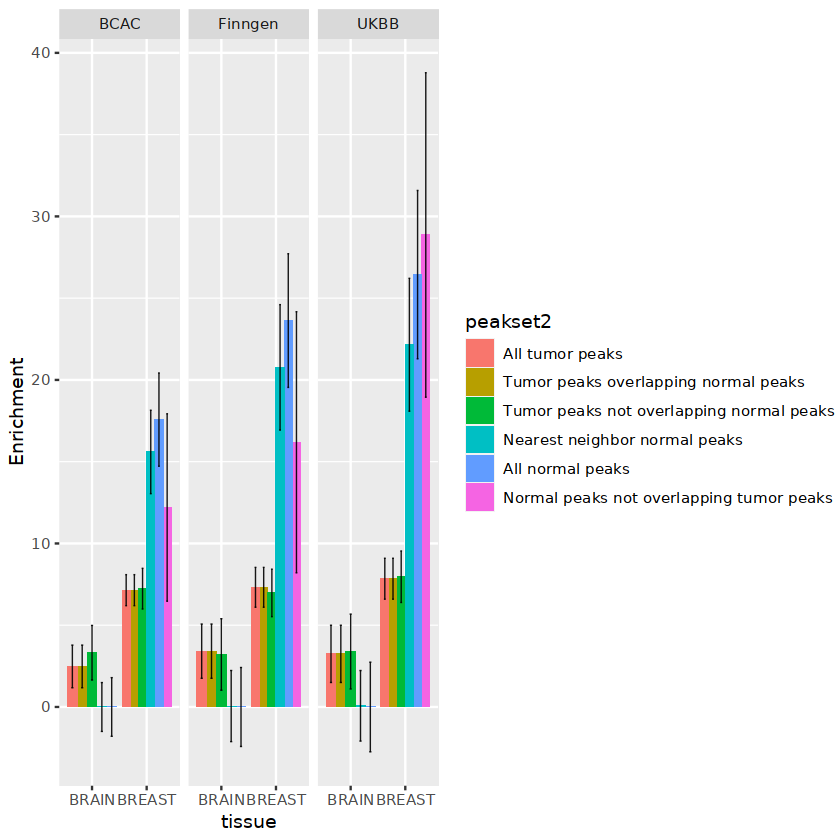

In [8]:
mean_enrich <- res_df[,mean(Enrichment), by=peakset][order(V1),]
res_df$peakset2 <- factor(res_df$peakset, levels=mean_enrich[[1]])
res_df[,idx:=as.numeric(factor(paste0(variants,tissue)))]
ggplot(res_df, aes(x=tissue, y=Enrichment, fill=peakset2)) + geom_col(position="dodge") + geom_errorbar( aes( ymin=Enrichment-Enrichment_std_error, ymax=Enrichment + Enrichment_std_error),position=position_dodge(.9), width=0.2, colour="black", alpha=0.9, size=.3) + facet_grid(cols=vars(variants))